# Heights, Areas, Volumes

In [1]:
from prep_n_load import *

Sat Jun 12 13:04:46 2021  UTC
5069 parcels loaded.


## Min & Max

In [2]:
print("Heights: {} min, {} max".format(parcels.height.min(), parcels.height.max()))
print("Areas:   {:.0f} min, {:.0f} max".format(parcels.area.min(), parcels.area.max()))
print("Volumes: {:.0f} min, {:.0f} max".format(parcels.voxvolume.min(), parcels.voxvolume.max()))

Heights: 6 min, 48 max
Areas:   15 min, 513 max
Volumes: 1557 min, 121968 max


## Simple histograms

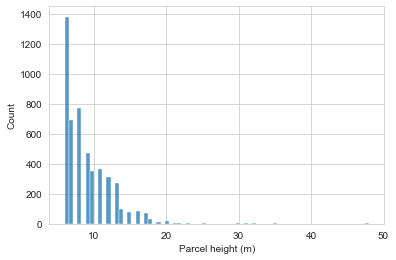

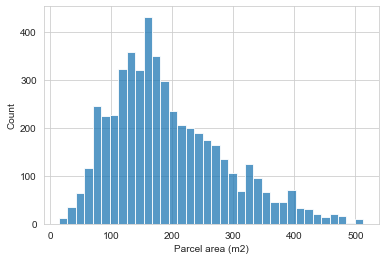

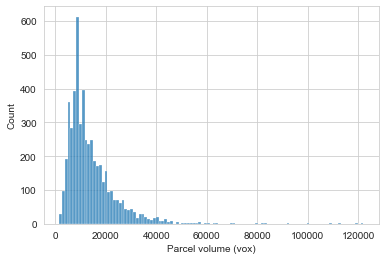

In [3]:
ax = sns.histplot(data=parcels.height)
ax.set(xlabel="Parcel height (m)")
plt.show()
ax = sns.histplot(data=parcels.area)
ax.set(xlabel="Parcel area (m2)")
plt.show()
ax = sns.histplot(data=parcels.voxvolume)
_ = ax.set(xlabel="Parcel volume (vox)")

## Zooming in on heights

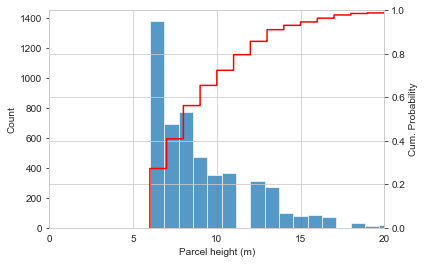

In [53]:
fig, ax = plt.subplots()
sns.histplot(data=parcels.height, ax=ax, bins=parcels.height.max()+1)
ax.set(xlabel="Parcel height (m)")
ax.set(xlim=(0, 20))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=parcels.height, ax=ax2, color="red")
ax2.set(xlim=(0, 20))
ax2.set(ylabel="Cum. Probability")
_ = plt.locator_params(axis="x", integer=True, tight=True)

* By far most parcels have a height of 6.
* Note that looks like there are no parcels of hight ~13 but that just seems to be a strange artifact of how `histplot` bucketizes the data.

90% of parcels have height <= 13, i.e. with a height > 13 a parcel is in the top decile of all parcels:

In [50]:
print("Parcels with height >= 13: {:.1%}".format(parcels[parcels.height <= 13].id.count()/parcels.id.count()))

Parcels with height >= 13: 91.1%


## Zooming in on volumes

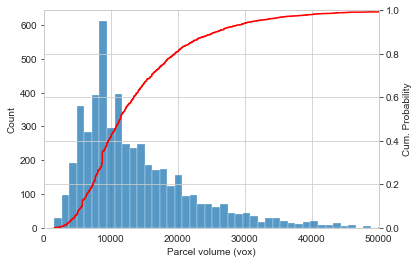

In [5]:
fig, ax = plt.subplots()
sns.histplot(data=parcels.voxvolume, ax=ax)
ax.set(xlabel="Parcel volume (vox)")
ax.set(xlim=(0, 50000))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=parcels.voxvolume, ax=ax2, color="red")
ax2.set(xlim=(0, 50000))
_ = ax2.set(ylabel="Cum. Probability")

* 80% of parcels with a volume < 20k vox.
* Anything beyond ~25-30k is in the top decile of volumes.

## Per island statistics

### Parcels per island

Without Origin City, which is currently an outlier with 3026 parcels.

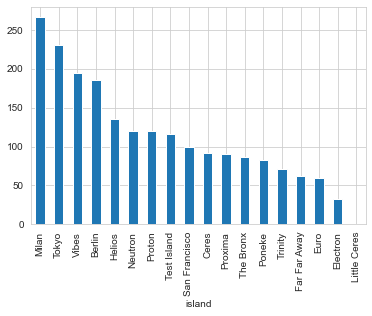

In [6]:
_ = island_sizes["parcels"].drop("Origin City").sort_values(ascending=False).plot(kind="bar")

### Heights distribution per island

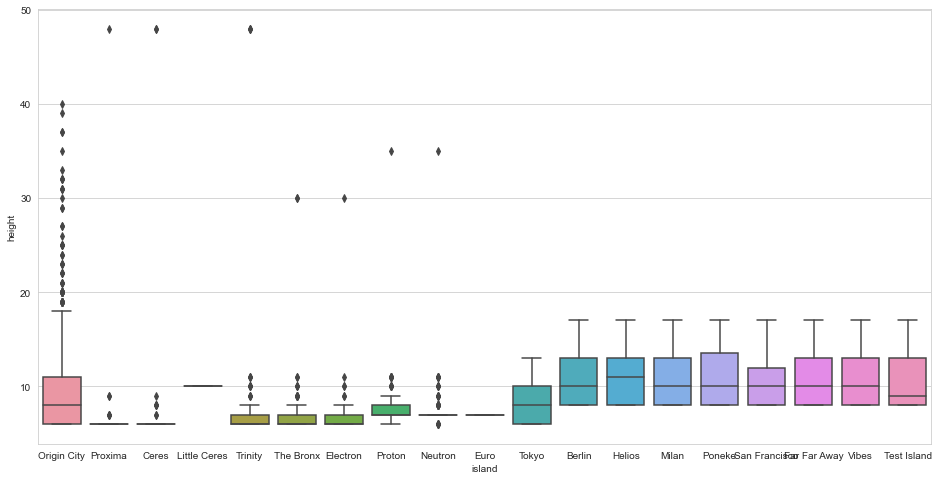

In [7]:
_, ax = plt.subplots(figsize=(16, 8))
_ = sns.boxplot(ax=ax, x="island", y="height", data=parcels)

* Islands seem to be getting more uniform, i.e., no more outliers in younger islands like San Francisco, Vibes, or Far Away.

### Total volume per island

In megavoxels. Again, ignoring Origin City with 46 megavoxels.

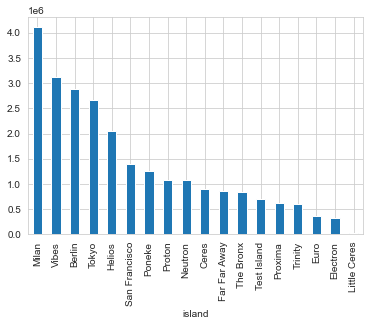

In [8]:
_ = island_sizes["voxvolume"].drop("Origin City").sort_values(ascending=False).plot(kind="bar")

### Volume distribution per island

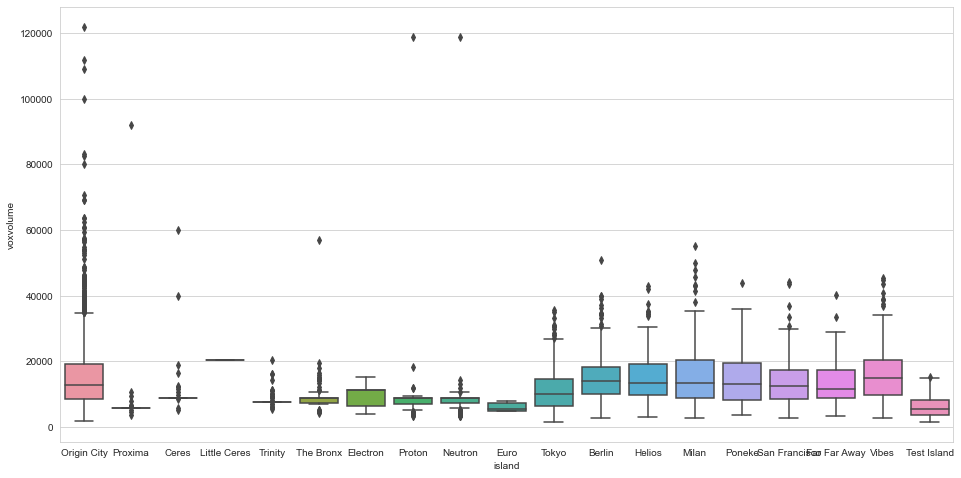

In [9]:
_, ax = plt.subplots(figsize=(16, 8))
_ = sns.boxplot(ax=ax, x="island", y="voxvolume", data=parcels)

### Average voxel volume per parcel and island

In [10]:
island_sizes["voxperparcel"].sort_values(ascending=False)

island
Little Ceres     20480.000000
Vibes            16044.051756
Berlin           15524.222234
Milan            15431.095792
Origin City      15290.829752
Poneke           15225.747108
Helios           15182.813165
San Francisco    14129.560822
Far Far Away     13892.535105
Tokyo            11594.260866
Ceres             9892.173913
The Bronx         9724.093023
Electron          9586.909091
Proton            9020.133333
Neutron           8944.333333
Trinity           8473.915493
Proxima           6817.244444
Euro              6133.866667
Test Island       5992.186594
Name: voxperparcel, dtype: float64